In [1]:
from typing import List

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import *
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.analytics_utils import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools




Cross-Validation measures:
+--------------------+----------+-------------+-----------+----------+
|                    |     mean |         std |       min |      max |
|--------------------+----------+-------------+-----------+----------|
| precision__class_0 | 0.999663 | 0.000126079 | 0.999467  | 0.999823 |
| recall__class_0    | 0.996993 | 0.000786017 | 0.99548   | 0.997871 |
| f1-score__class_0  | 0.998326 | 0.000420209 | 0.997558  | 0.998846 |
| precision__class_1 | 0.129045 | 0.0546217   | 0.0576923 | 0.225806 |
| recall__class_1    | 0.552778 | 0.172133    | 0.25      | 0.777778 |
| f1-score__class_1  | 0.20799  | 0.0832824   | 0.1       | 0.35     |
| accuracy           | 0.996659 | 0.000837308 | 0.995129  | 0.997695 |
| auc                | 0.943784 | 0.0440374   | 0.865928  | 0.998103 |
+--------------------+----------+-------------+-----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


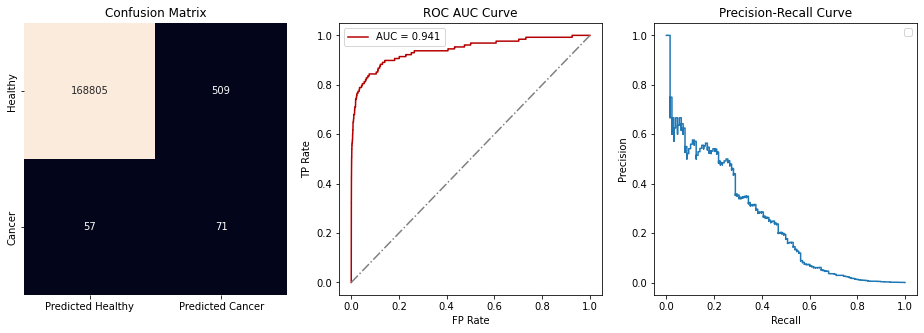

In [2]:
single_cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')



Cross-Validation measures:
+--------------------+-----------+-------------+----------+----------+
|                    |      mean |         std |      min |      max |
|--------------------+-----------+-------------+----------+----------|
| precision__class_0 | 0.999538  | 0.000231329 | 0.999016 | 0.999823 |
| recall__class_0    | 0.996637  | 0.000857611 | 0.995399 | 0.998152 |
| f1-score__class_0  | 0.998085  | 0.000428087 | 0.997233 | 0.998767 |
| precision__class_1 | 0.0835833 | 0.0602229   | 0        | 0.176471 |
| recall__class_1    | 0.38277   | 0.241106    | 0        | 0.777778 |
| f1-score__class_1  | 0.133621  | 0.0912577   | 0        | 0.285714 |
| accuracy           | 0.996179  | 0.00085284  | 0.994482 | 0.997538 |
| auc                | 0.825113  | 0.109238    | 0.649522 | 0.982172 |
+--------------------+-----------+-------------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


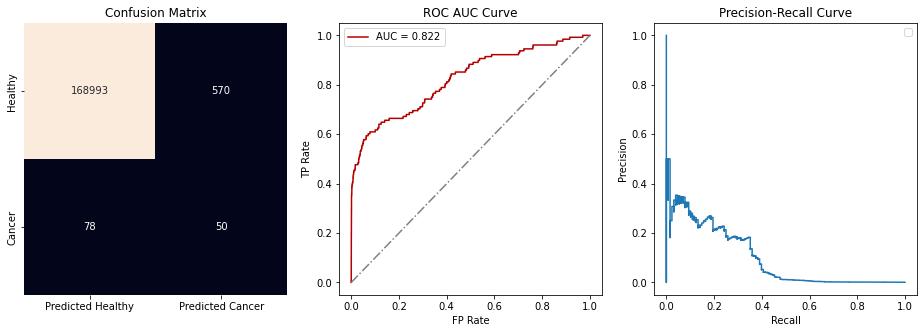

In [3]:
cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')



Cross-Validation measures:
+--------------------+-------------+-------------+----------+------------+
|                    |        mean |         std |      min |        max |
|--------------------+-------------+-------------+----------+------------|
| precision__class_0 | 0.99904     | 0.000209549 | 0.998631 | 0.999342   |
| recall__class_0    | 0.949685    | 0.00627827  | 0.934483 | 0.957029   |
| f1-score__class_0  | 0.973727    | 0.00328607  | 0.965679 | 0.977531   |
| precision__class_1 | 0.000957433 | 0.00119223  | 0        | 0.00338983 |
| recall__class_1    | 0.0529491   | 0.06444     | 0        | 0.176471   |
| f1-score__class_1  | 0.00187973  | 0.00233896  | 0        | 0.00665188 |
| accuracy           | 0.948821    | 0.00622194  | 0.933639 | 0.95605    |
| auc                | 0.505001    | 0.0848735   | 0.390825 | 0.681717   |
+--------------------+-------------+-------------+----------+------------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


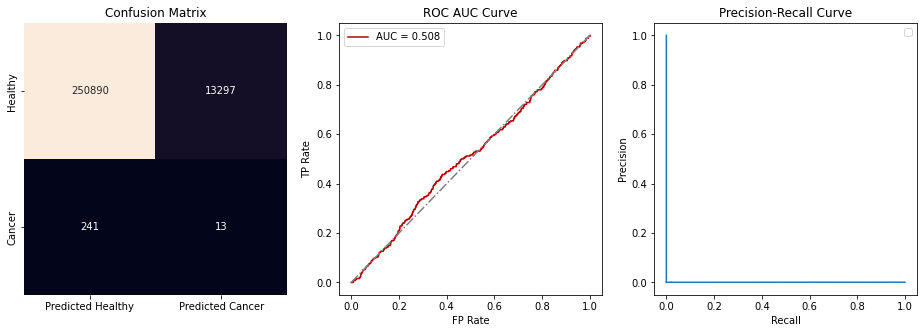

In [4]:
cv_analytics_util_not_screened = load_cv_analytics_util_see_stats('experiment_not_screened_cols_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

X-axis -1 means that somewhere withing the next year person gets cancer. -2 means somewhere between year -1 and 0 person gets cancer.

While for patients who developed cancer, we alligned them by the year when they got cancer. So, what I did is that I looked at the people who got cancer within the first 5 years of the experiment and who got cancer within that period. I aligned them on the year they got cancer and calculated the average estimated probability of them getting cancer as predicted by model 1 year before actually getting cancer, 2 years before actually getting cancer and so on. This is what the result I got based on the dataset with questionnaire and screening data:

There is an interesting correlation, and we can see that the increase in the probability is non-linear. (I also included the standard deviation interval). On the other hand, the graph based on the same selection of individuals, but only using the questionnaire data, did not exhibit such characteristics:

For the individuals who did not develop cancer, they were alligned by the date of their last exam. Just to verify if there is no fluke, I tested this also on a general population and there is no correlation (they are just aligned based on the last observation)

+---------------------------+---------+----------+----------+------------+-----------+----------+----------+----------+
|                           |   count |     mean |      std |        min |       25% |      50% |      75% |      max |
|---------------------------+---------+----------+----------+------------+-----------+----------+----------+----------|
| cancer_in_next_1_years_-6 |       8 | 0.15368  | 0.103436 | 0.0188118  | 0.083941  | 0.174416 | 0.186393 | 0.345969 |
| cancer_in_next_1_years_-5 |      21 | 0.167886 | 0.125033 | 0.00837054 | 0.0831084 | 0.167689 | 0.231072 | 0.507029 |
| cancer_in_next_1_years_-4 |      42 | 0.172007 | 0.134139 | 0.00430384 | 0.0727196 | 0.1625   | 0.240485 | 0.633694 |
| cancer_in_next_1_years_-3 |      59 | 0.16298  | 0.130997 | 0.00430384 | 0.054794  | 0.139352 | 0.236576 | 0.633694 |
| cancer_in_next_1_years_-2 |      84 | 0.15917  | 0.128397 | 0.00430384 | 0.0534321 | 0.119122 | 0.234976 | 0.633694 |
| cancer_in_next_1_years_-1 |     128 | 

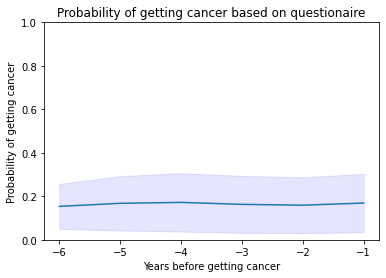

In [5]:
full_dataset = extract_full_dataset_filter_cancer(cv_analytics_util_not_screened)
plot_change_in_confidence(full_dataset, title='Probability of getting cancer based on questionaire')

In [6]:
single_cv_analytics_util.merge_in_dataset(get_screened_first_5_no_process_dataset(label = f'cancer_in_next_1_years'))

Added new records: 249


+---------------------------+---------+------------+------------+-------------+-------------+-------------+-------------+------------+
|                           |   count |       mean |        std |         min |         25% |         50% |         75% |        max |
|---------------------------+---------+------------+------------+-------------+-------------+-------------+-------------+------------|
| cancer_in_next_1_years_-6 |       8 | 0.00150415 | 0.00156809 | 0.000175399 | 0.000270052 | 0.000820572 | 0.00241809  | 0.00403006 |
| cancer_in_next_1_years_-5 |      21 | 0.0258624  | 0.106944   | 0.000118321 | 0.000268617 | 0.000452017 | 0.000930233 | 0.49112    |
| cancer_in_next_1_years_-4 |      42 | 0.0424556  | 0.177323   | 7.95349e-05 | 0.000298688 | 0.000617473 | 0.00273289  | 0.995935   |
| cancer_in_next_1_years_-3 |      59 | 0.0222106  | 0.128338   | 7.95349e-05 | 0.000407667 | 0.0012506   | 0.00442698  | 0.987063   |
| cancer_in_next_1_years_-2 |      84 | 0.054167   | 0.

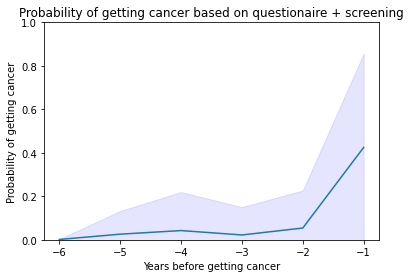

In [7]:
full_dataset = extract_full_dataset_filter_cancer(single_cv_analytics_util)
plot_change_in_confidence(full_dataset, title='Probability of getting cancer based on questionaire + screening')

+---------------------------+---------+------------+------------+-------------+------------+------------+------------+-----------+
|                           |   count |       mean |        std |         min |        25% |        50% |        75% |       max |
|---------------------------+---------+------------+------------+-------------+------------+------------+------------+-----------|
| cancer_in_next_1_years_-6 |       8 | 0.00466646 | 0.00378385 | 0.000633523 | 0.00198607 | 0.00315778 | 0.00703849 | 0.0106984 |
| cancer_in_next_1_years_-5 |      21 | 0.00769262 | 0.0202468  | 0.000383665 | 0.001152   | 0.00244812 | 0.00464306 | 0.0950095 |
| cancer_in_next_1_years_-4 |      42 | 0.0363978  | 0.157744   | 0.000217078 | 0.00134714 | 0.00320189 | 0.00625623 | 0.982127  |
| cancer_in_next_1_years_-3 |      59 | 0.0275448  | 0.128744   | 0.000198047 | 0.00147735 | 0.00433026 | 0.0112175  | 0.987446  |
| cancer_in_next_1_years_-2 |      84 | 0.0662875  | 0.200979   | 0.000198047 | 0.0

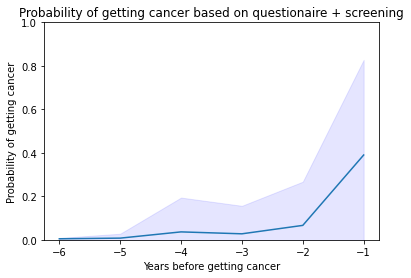

In [8]:
full_dataset = extract_full_dataset_filter_cancer(cv_analytics_util)
plot_change_in_confidence(full_dataset, title='Probability of getting cancer based on questionaire + screening')

+---------------------------+---------+-----------+-----------+-------------+------------+------------+------------+----------+
|                           |   count |      mean |       std |         min |        25% |        50% |        75% |      max |
|---------------------------+---------+-----------+-----------+-------------+------------+------------+------------+----------|
| cancer_in_next_1_years_-6 |   25093 | 0.0122055 | 0.0514338 | 5.56495e-05 | 0.00113083 | 0.00264814 | 0.00713346 | 0.998604 |
| cancer_in_next_1_years_-5 |   27835 | 0.0126598 | 0.0509896 | 4.10353e-05 | 0.00114468 | 0.00275492 | 0.00752585 | 0.993553 |
| cancer_in_next_1_years_-4 |   28731 | 0.013295  | 0.0539357 | 4.91262e-05 | 0.00118304 | 0.00283766 | 0.0078797  | 0.996798 |
| cancer_in_next_1_years_-3 |   28908 | 0.0143413 | 0.0594075 | 5.84529e-05 | 0.00119621 | 0.00292857 | 0.00814613 | 0.997604 |
| cancer_in_next_1_years_-2 |   28275 | 0.0147306 | 0.0567026 | 6.2635e-05  | 0.00136833 | 0.00339581 | 

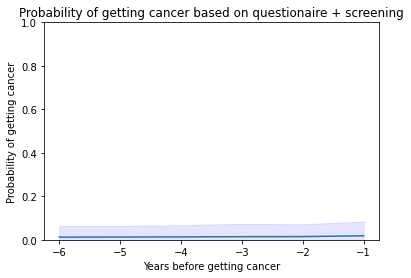

In [9]:
full_dataset = cv_analytics_util.get_dataset_with_predictions()
plot_change_in_confidence(full_dataset, title='Probability of getting cancer based on questionaire + screening')

In [10]:
full_dataset = cv_analytics_util.get_dataset_with_predictions()

threshold = 0.2
idx = full_dataset[(full_dataset['cancer_in_next_1_years_prob'] >= threshold) & (full_dataset['ovar_cancer'] == 0)]['plco_id'].unique()
full_dataset = full_dataset[full_dataset['plco_id'].isin(idx)]
full_dataset = full_dataset[full_dataset['study_yr'] >= 0]
full_dataset = full_dataset[full_dataset['ovar_observe_year'] <= 5]
dict_years_pred = {}
 
for plco_id in full_dataset['plco_id'].unique():
    # TODO: i can change min and max
    dict_years_pred[plco_id] = full_dataset[(full_dataset['plco_id'] == plco_id) & (full_dataset['cancer_in_next_1_years_prob'] >= threshold)]['ovar_observe_year'].min()
    full_dataset = full_dataset[((full_dataset['plco_id'] == plco_id) & (full_dataset['ovar_observe_year'] <= dict_years_pred[plco_id])) | (full_dataset['plco_id'] != plco_id)]

+---------------------------+---------+-----------+-----------+-------------+------------+-----------+-----------+----------+
|                           |   count |      mean |       std |         min |        25% |       50% |       75% |      max |
|---------------------------+---------+-----------+-----------+-------------+------------+-----------+-----------+----------|
| cancer_in_next_1_years_-6 |      66 | 0.0283591 | 0.0389536 | 0.000624935 | 0.00347049 | 0.0116734 | 0.041293  | 0.192557 |
| cancer_in_next_1_years_-5 |     128 | 0.0357683 | 0.0485467 | 0.000183095 | 0.00390084 | 0.0145995 | 0.0404848 | 0.18645  |
| cancer_in_next_1_years_-4 |     216 | 0.0362046 | 0.0449836 | 0.000449269 | 0.00419053 | 0.0154027 | 0.0557523 | 0.19156  |
| cancer_in_next_1_years_-3 |     357 | 0.0384593 | 0.0479167 | 0.000287728 | 0.0042182  | 0.0161007 | 0.059161  | 0.198421 |
| cancer_in_next_1_years_-2 |     511 | 0.0498267 | 0.0555847 | 0.000239296 | 0.00677231 | 0.0255009 | 0.0842242 | 0.1

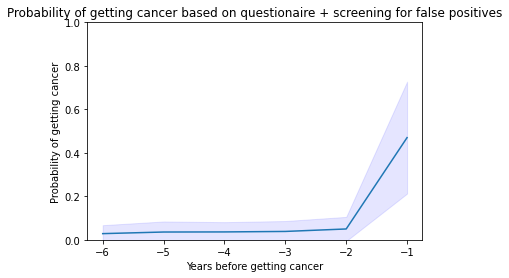

In [11]:
# full_dataset = full_dataset[full_dataset['cancer_in_next_1_years_prob'] >= threshold]
plot_change_in_confidence(full_dataset, title='Probability of getting cancer based on questionaire + screening for false positives')